# Imports

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy
import itertools

# Low pass filter

We want to analyse data from the stock market. To see the long term trends we want to "smooth" the day to day market oscillation, and keep the fluctuation which have a long period.

We will take the Fourier transform of the data and throw away the 90% and 98% modes with highest frequency, and antitrasform to get the smoothed data

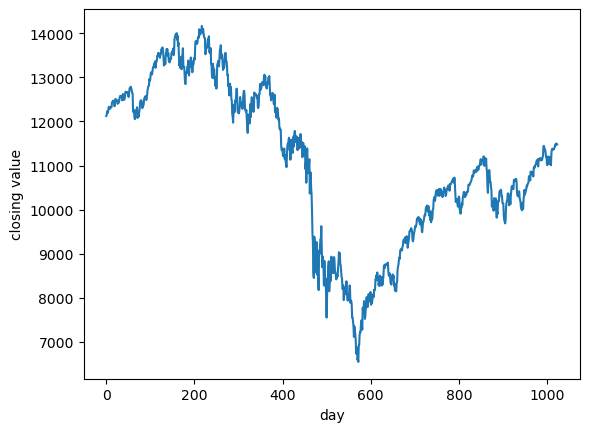

In [2]:
dow_data = np.loadtxt("dow.txt")

plt.plot(dow_data)
plt.xlabel("day")
plt.ylabel("closing value")
plt.show()

These are the Fourier coefficients

1024
513


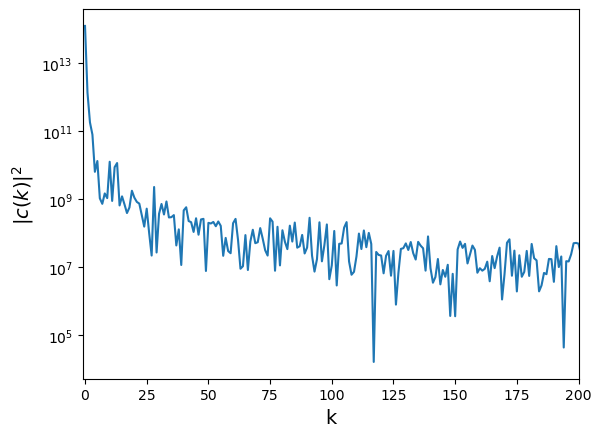

In [3]:
cks = np.fft.rfft(dow_data)
print(len(dow_data))
print(len(cks))

plt.plot(abs(cks)**2)
plt.semilogy()
plt.xlim(-1,200)
plt.xlabel('k',size = 14)
plt.ylabel('$|c(k)|^2$',size=14)
plt.show()

We set to 0 90% of them

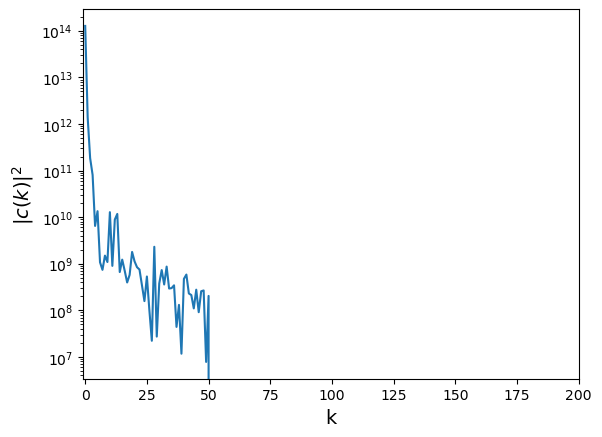

In [4]:
cks[len(cks)//10:] = 0

plt.plot(abs(cks)**2)
plt.semilogy()
plt.xlim(-1,200)
plt.xlabel('k',size = 14)
plt.ylabel('$|c(k)|^2$',size=14)
plt.show()

We antitrasform to get the smoothed data

In [5]:
dow_data_smooth0p1 = np.fft.irfft(cks)

Same but setting to 0 98% of them

In [6]:
cks[len(cks)//50:] = 0
dow_data_smooth0p02 = np.fft.irfft(cks)

Now we can compare the data in real space

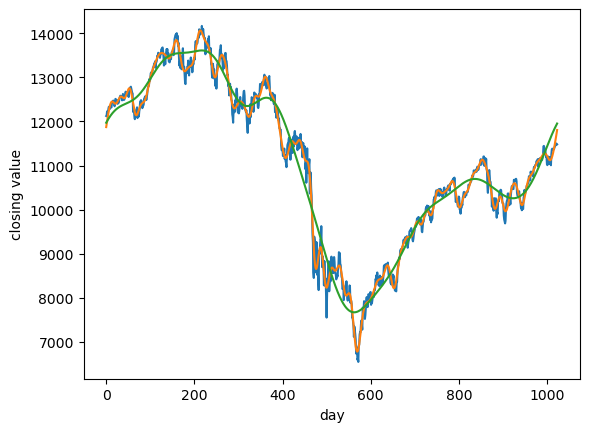

In [7]:
plt.plot(dow_data)
plt.plot(dow_data_smooth0p1)
plt.plot(dow_data_smooth0p02)
plt.xlabel("day")
plt.ylabel("closing value")
plt.show()

# Ringing

Pay attention when you apply a smoothing, or when you otherwise use Fourier coefficients to represent a signal with sharp features.

Consider a square wave

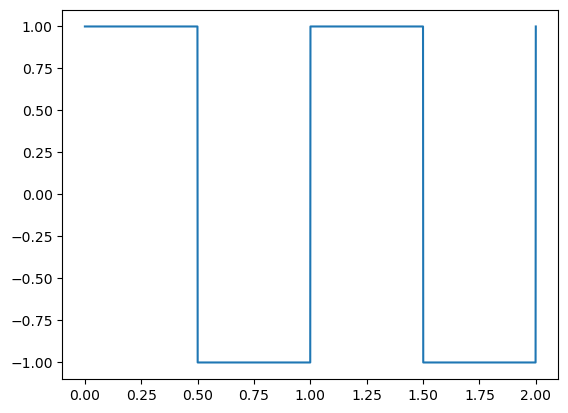

In [8]:
def square_wave(x):
    return np.sign(0.5-x%1.)

xs = np.linspace(0,2,2000)
wd = square_wave(xs)

plt.plot(xs, wd)
plt.show()

We can try to represent it with 5 or 20 Fourier coefficients and see what happens

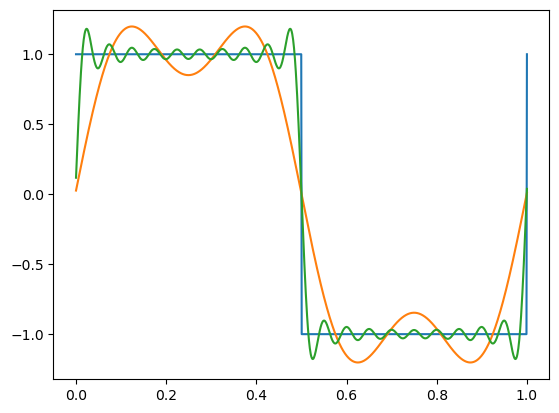

In [9]:
xs = np.linspace(0,1,1000)
plt.plot(xs, square_wave(xs))

def smooth(N):
    cks = np.fft.rfft(square_wave(xs))
    cks[N:]=0
    plt.plot(xs, np.fft.irfft(cks))

smooth(5)
smooth(20)

plt.show()